# **Breast Cancer Data Analysis and Machine Learning Project**

# Part 2: Machine Learning Notebook

**Introduction**:

The aim of this project is to predict breast cancer survival using machine learning models with clinical and gene expression profiles. By using machine learning models on genetic data, we can improve our understanding of cancers and survival prediction.

The dataset used in this analysis is the Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) database, which is a Cananda-UK Project which contains targeted sequencing data of 1,980 primary breast cancer samples.



---



**Predictive Modeling Considerations:**

- Target variable: Predict Survival (classification)
- Key predictors: gene expression values, tumor stage, hormone receptor status
- Preprocessing: Feature selection (e.g., PCA), scaling, dealing with high-dimensional data



---



**Modeling Approach:**

- **Classification Models**: Logistic Regression, Decision Tree, Random Forest, SVM, KNN, Naive Bayes



---

**Model Optimization:**
- Data preprocessing: feature engineering, scaling, transformations
- Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
- Cross-validation for improved generalization
- Selection of top performing models for further refinement


---



**Evaluation & Visualization:**
Confusion Matrix, ROC-AUC curves for classification
Feature importance plots to highlight the most influential genes or clinical features


**The following metrics were used to evaluate the outputs of the model:**
1. The Confusion Matrix, which includes the four possible outcomes of binary classification:
  - True Positive
  - True Negative
  - False Negative
  - False Postive

2. The AUC is the Area Under the Receiver Operating Characteristic (ROC) Curve. It can be interpreted as the extent of how well the model is able to distinguish between the two different classes.

3. Accuracy: the number of correct assessments (True positives + true negatives)/ total number of instances

**Results**: I tested 3 different XGBoost models to determine which features, clinical, genetic, or both best predict survival. The results showed that the best performing model was the one using only clinical features, achieving an accuracy score of 77% and an AUV-ROC score of 0.86. The model using genetic features alone performed worse, with an accuracy score of 65% and an AUC of 0.68.


In [13]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

# Other
import pickle, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from numbers import Number

#Basic libraries
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans


from IPython.display import set_matplotlib_formats
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [68]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Drop null values
df2 = df.dropna()
df2.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df2['overall_survival'].value_counts()

,count
overall_survival,
0,608
1,484


In [ ]:
df2['overall_survival_months'].value_counts()

,count
overall_survival_months,
19.733333,3
226.066667,2
36.633333,2
122.700000,2
131.300000,2
...,...
271.266667,1
85.866667,1
231.033333,1


In [38]:
# Create a new dataframe with clinical attributes only
clinical_df = df.iloc[:, 0:32]
clinical_df.head(3)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living,-1.399
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,-1.380
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease,0.067


In [ ]:
# dropping mutations
genetic_features_to_drop = df2.columns[520:]
genetic_df = df2.drop(genetic_features_to_drop, axis=1)
# droping clinical data
genetic_features_to_drop = genetic_df.columns[4:35]
genetic_df = genetic_df.drop(genetic_features_to_drop, axis=1)
genetic_df = genetic_df.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
genetic_df = genetic_df.iloc [:,:-174]
genetic_df['overall_survival']= df2['overall_survival']

# Using XGBoost for Survival Classification: Died vs. Survived

In [14]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from xgboost.sklearn import XGBClassifier

In [36]:
# Convert survival status to binary (0 = Died, 1 = Survived)
df2["overall_survival"].value_counts()

,count
overall_survival,
0,608
1,484


XGBoost for Clinical Data:

In [59]:
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()

unwanted_columns = ['patient_id','death_from_cancer' ]

categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns]

dummies_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)

In [60]:
# data splitting
X = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_clinical_df['overall_survival']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [62]:
# Convert data into XGBoost format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    "objective": "binary:logistic",  # Binary classification
    "eval_metric": "auc",  # Use AUC as evaluation metric
    "max_depth": 6,  # Control complexity
    "eta": 0.1,  # Learning rate
    "subsample": 0.8,  # Use 80% of data per tree
    "colsample_bytree": 0.8,  # Use 80% of features per tree
    "random_state": 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

In [63]:
# Predict on test set
y_pred_prob = model.predict(dtest)  # Probability scores
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7742448330683624
ROC-AUC Score: 0.8589467136636948
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       364
           1       0.73      0.73      0.73       265

    accuracy                           0.77       629
   macro avg       0.77      0.77      0.77       629
weighted avg       0.77      0.77      0.77       629

Confusion Matrix:
 [[294  70]
 [ 72 193]]


Top Predictors (Feature Importance):
                                                importance
cohort                                            4.244074
type_of_breast_surgery_MASTECTOMY                 4.158182
overall_survival_months                           3.811263
age_at_diagnosis                                  3.298428
integrative_cluster_10                            2.852847
3-gene_classifier_subtype_ER+/HER2- Low Prolif    2.679636
pr_status_Negative                                2.492716
pam50_+_claudin-low_subtype_Basal                 2.424500
integrative_cluster_1                             2.312374
tumor_other_histologic_subtype_Mixed              2.305315


<Figure size 1000x600 with 0 Axes>

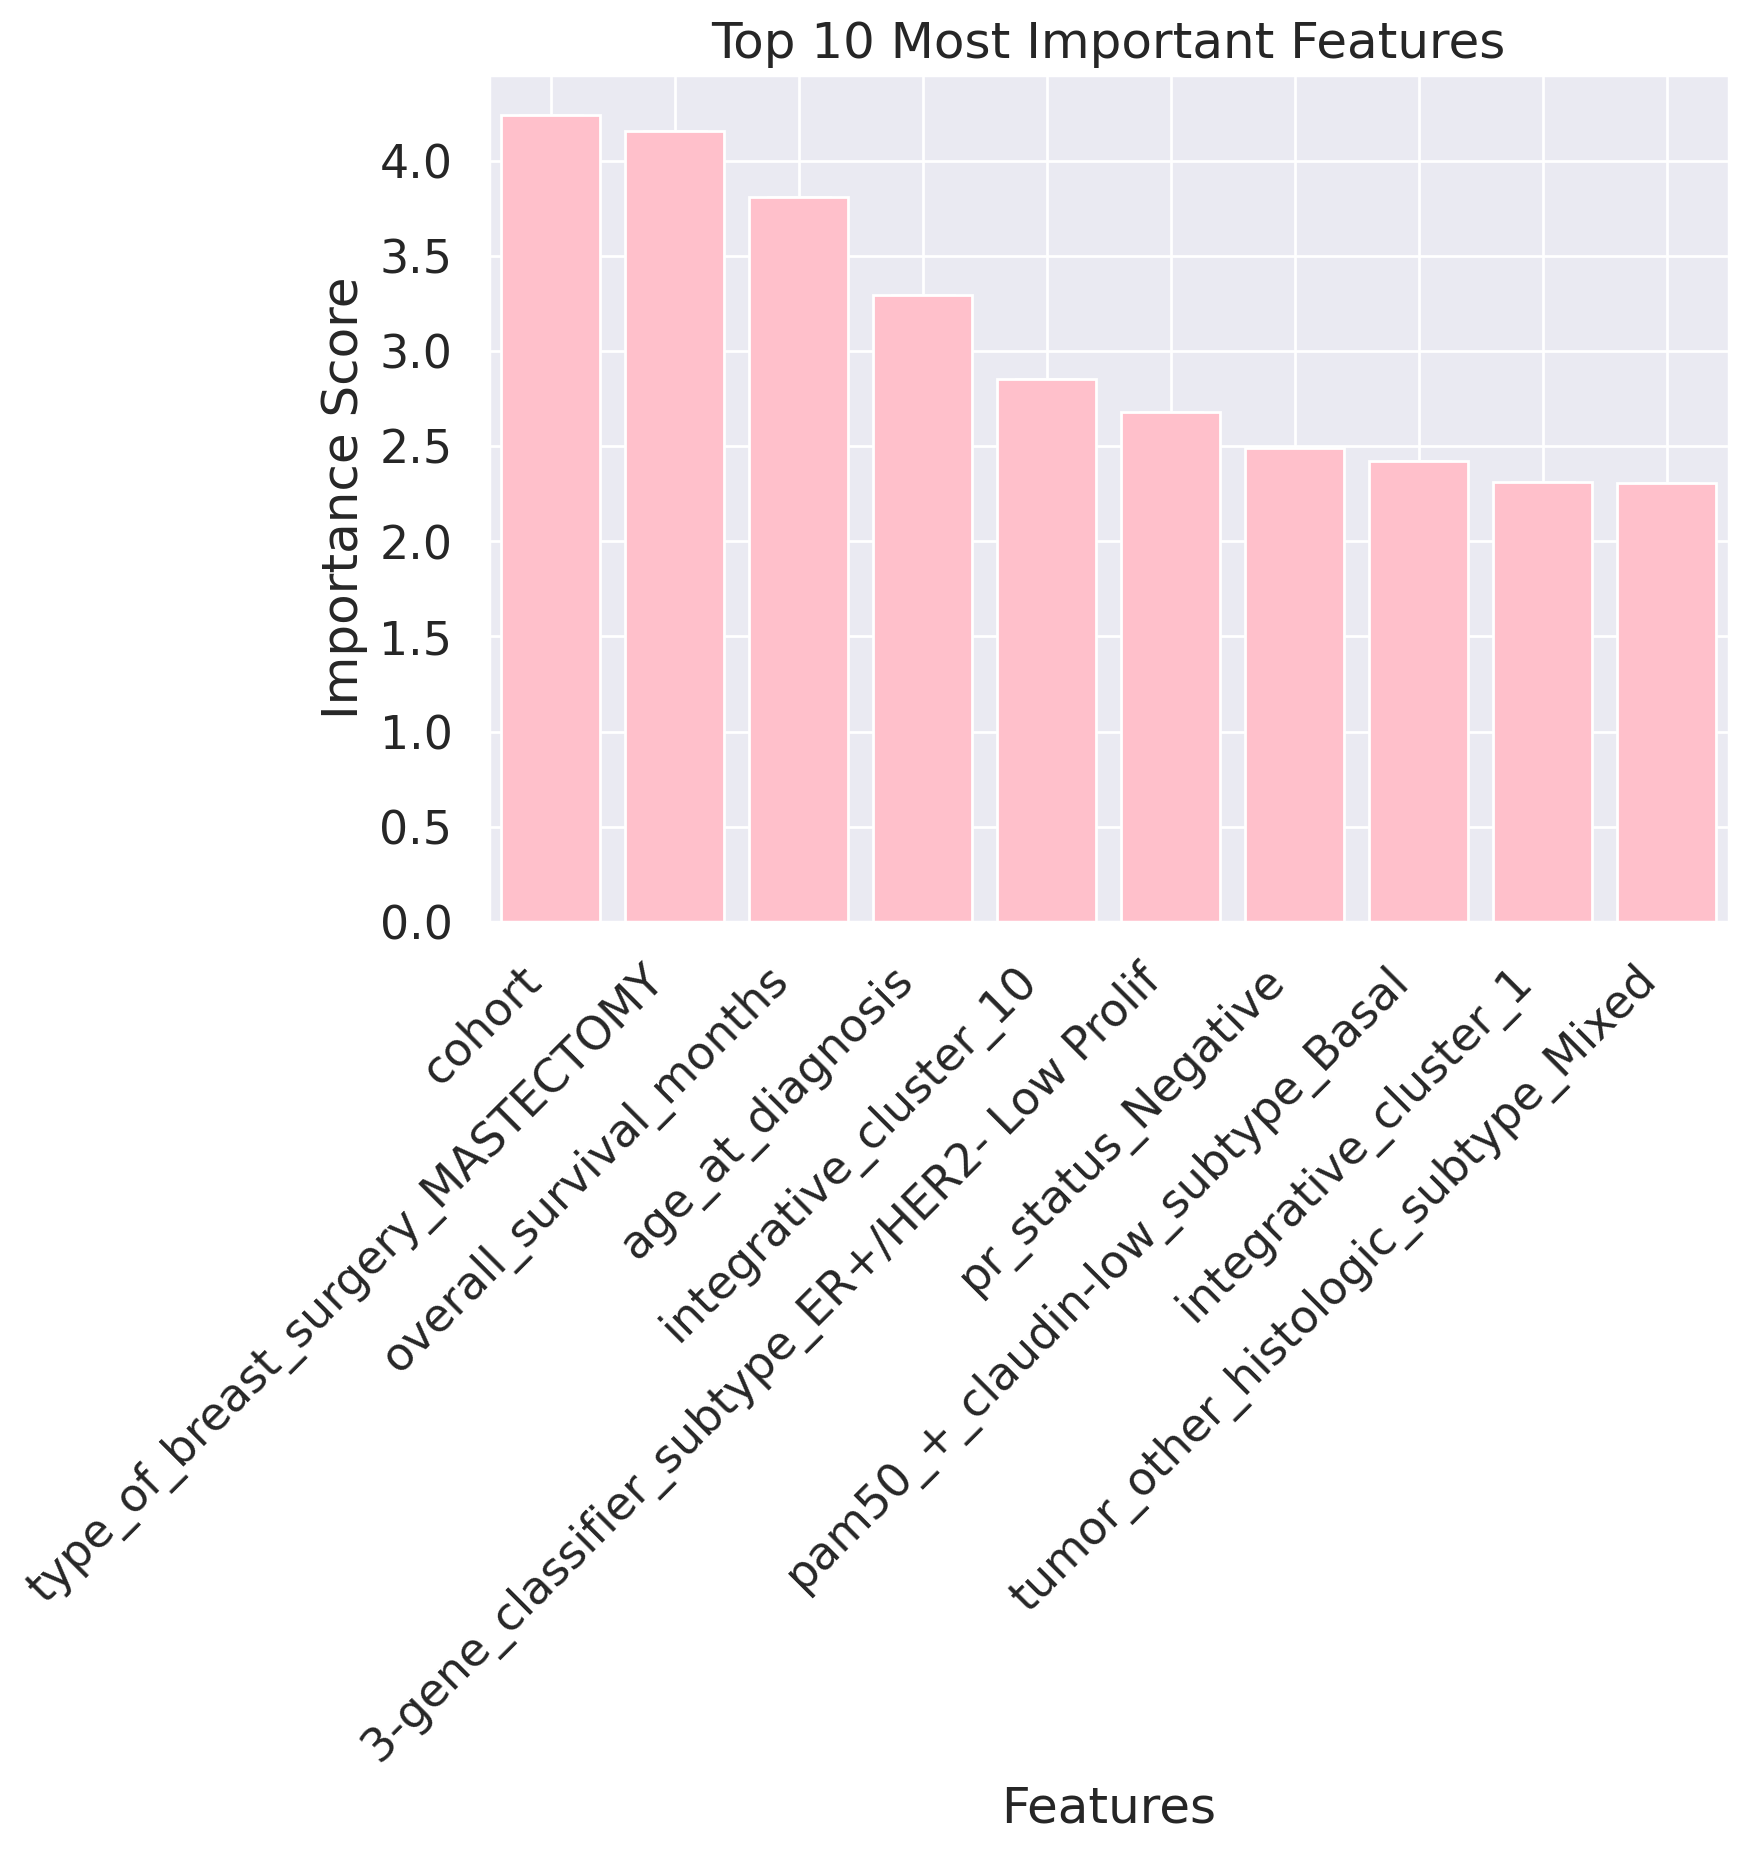

In [65]:
# find the top predictors or most influential clinical factors that contribute to survival based on the model

import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Get feature importances from the trained XGBoost model
feature_importances = model.get_score(importance_type="gain")

# Create a DataFrame for better visualization
importance_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['importance'])
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Print or visualize the top predictors
print("Top Predictors (Feature Importance):")
print(importance_df.head(10))  # Print the top 10 features

# create a bar plot to visualize feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='bar')
plt.title('Top 10 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')

# make bars pink
plt.bar(importance_df.head(10).index, importance_df.head(10)['importance'], color='pink')

# remove legend
plt.legend().remove()

plt.show()


# XGBoost for Genetic Features:

In [11]:
genetic_features_to_drop = df.columns[4:35]
genetic_df = df.drop(genetic_features_to_drop, axis=1)
genetic_df = genetic_df.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
genetic_df = genetic_df.iloc [:,:-174]
genetic_df['overall_survival']= df['overall_survival']

# data splitting
X = genetic_df.drop(['patient_id', 'overall_survival'], axis=1)
y = genetic_df['overall_survival']

X_train, X_test, y_train, y_test_g = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [16]:
# Convert data into XGBoost format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test_g)

# Define XGBoost parameters
params = {
    "objective": "binary:logistic",  # Binary classification
    "eval_metric": "auc",  # Use AUC as evaluation metric
    "max_depth": 6,  # Control complexity
    "eta": 0.1,  # Learning rate
    "subsample": 0.8,  # Use 80% of data per tree
    "colsample_bytree": 0.8,  # Use 80% of features per tree
    "random_state": 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

In [19]:
# Predict on test set
y_pred_prob = model.predict(dtest)  # Probability scores
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test_g, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test_g, y_pred_prob))
print("Classification Report:\n", classification_report(y_test_g, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_g, y_pred))

Accuracy: 0.6502384737678856
ROC-AUC Score: 0.6835475844909807
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.72       364
           1       0.62      0.45      0.52       265

    accuracy                           0.65       629
   macro avg       0.64      0.62      0.62       629
weighted avg       0.64      0.65      0.64       629

Confusion Matrix:
 [[290  74]
 [146 119]]


# XGBoost for All Features

In [49]:
all_categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
all_categorical_columns = [ele for ele in all_categorical_columns if ele not in unwanted_columns]
dumm_df = pd.get_dummies(df.drop('patient_id',axis=1 ), columns= all_categorical_columns, dummy_na=True)

In [50]:
# data splitting
X = dumm_df.drop(['death_from_cancer','overall_survival'], axis=1)
y = dumm_df['overall_survival']

X_train, X_test, y_train, y_test_all = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
# Convert data into XGBoost format
dtrain = xgb.DMatrix(X_train.values, label=y_train)
dtest = xgb.DMatrix(X_test.values, label=y_test_all)

# Define XGBoost parameters
params = {
    "objective": "binary:logistic",  # Binary classification
    "eval_metric": "auc",  # Use AUC as evaluation metric
    "max_depth": 6,  # Control complexity
    "eta": 0.1,  # Learning rate
    "subsample": 0.8,  # Use 80% of data per tree
    "colsample_bytree": 0.8,  # Use 80% of features per tree
    "random_state": 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

In [52]:
# Predict on test set
y_pred_prob = model.predict(dtest)  # Probability scores
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test_all, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test_all, y_pred_prob))
print("Classification Report:\n", classification_report(y_test_all, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_all, y_pred))

Accuracy: 0.7647058823529411
ROC-AUC Score: 0.8471969744457677
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       371
           1       0.72      0.69      0.71       258

    accuracy                           0.76       629
   macro avg       0.76      0.75      0.76       629
weighted avg       0.76      0.76      0.76       629

Confusion Matrix:
 [[303  68]
 [ 80 178]]


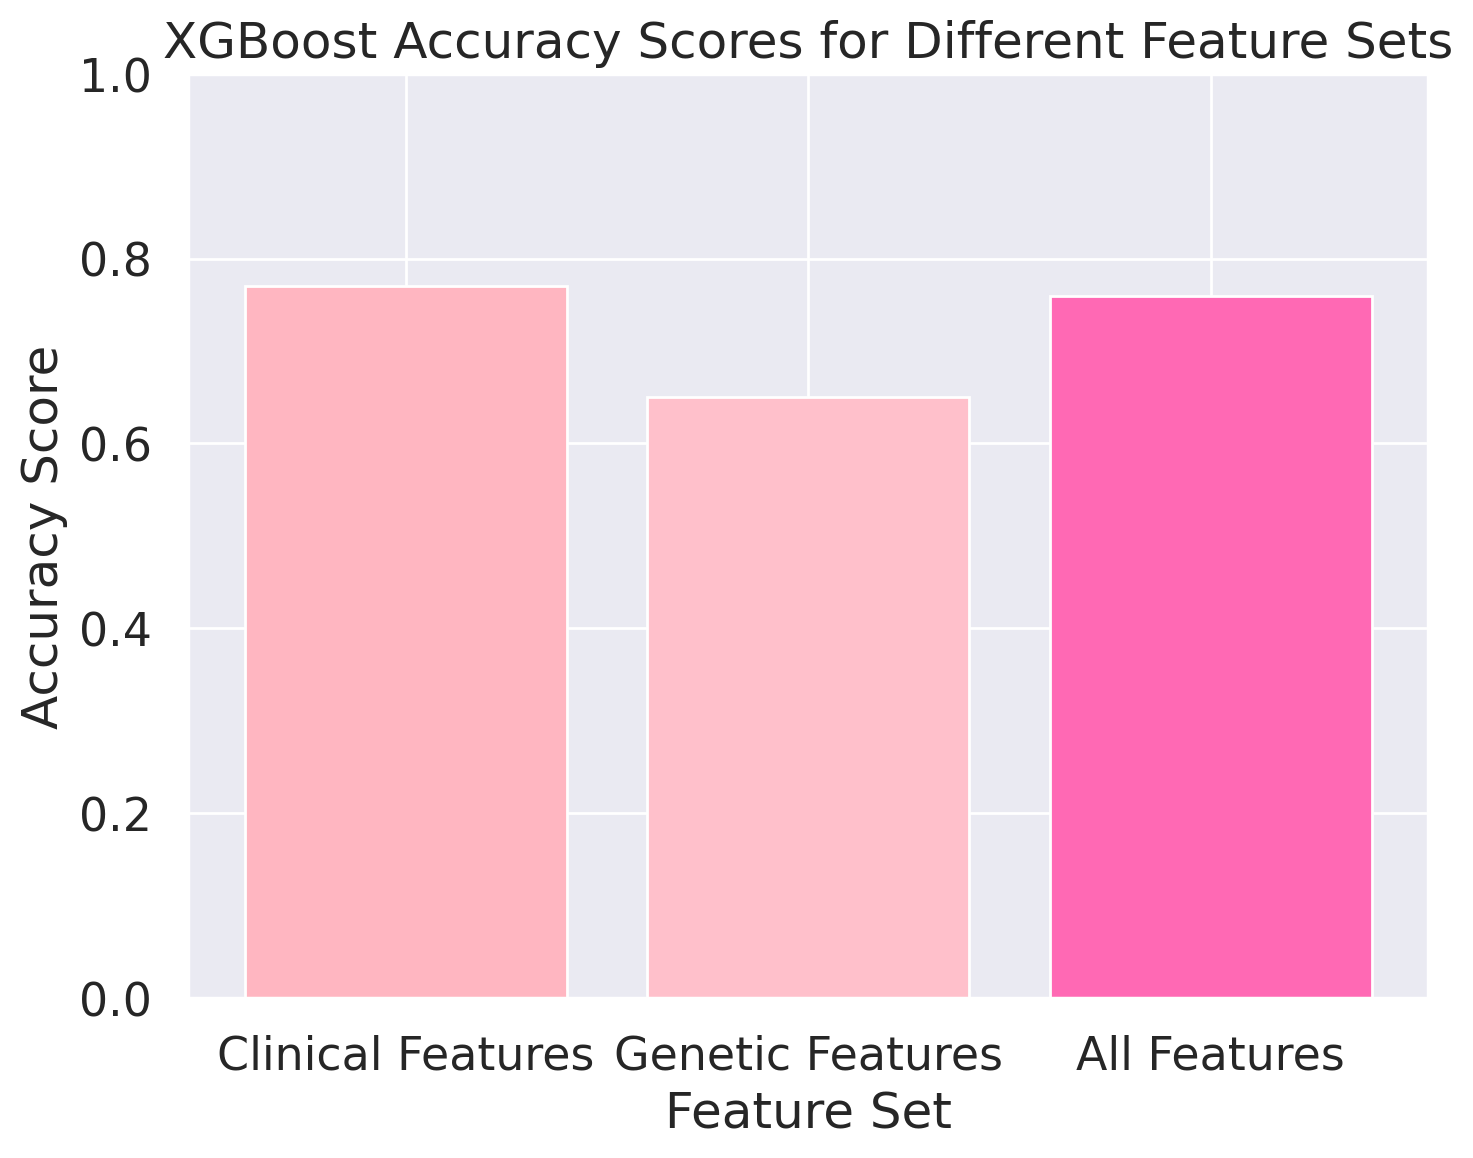

In [35]:
# create a graph of the accuracy scores for xgboost with clinical features, genetic features, and all features

import matplotlib.pyplot as plt

# Accuracy scores (replace with your actual accuracy scores)
accuracy_scores = {
    'Clinical Features': 0.77,
    'Genetic Features': 0.65,
    'All Features': 0.76
}

features = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(8, 6))
plt.bar(features, scores, color=['lightpink', 'pink', 'hotpink'])
plt.xlabel("Feature Set")
plt.ylabel("Accuracy Score")
plt.title("XGBoost Accuracy Scores for Different Feature Sets")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


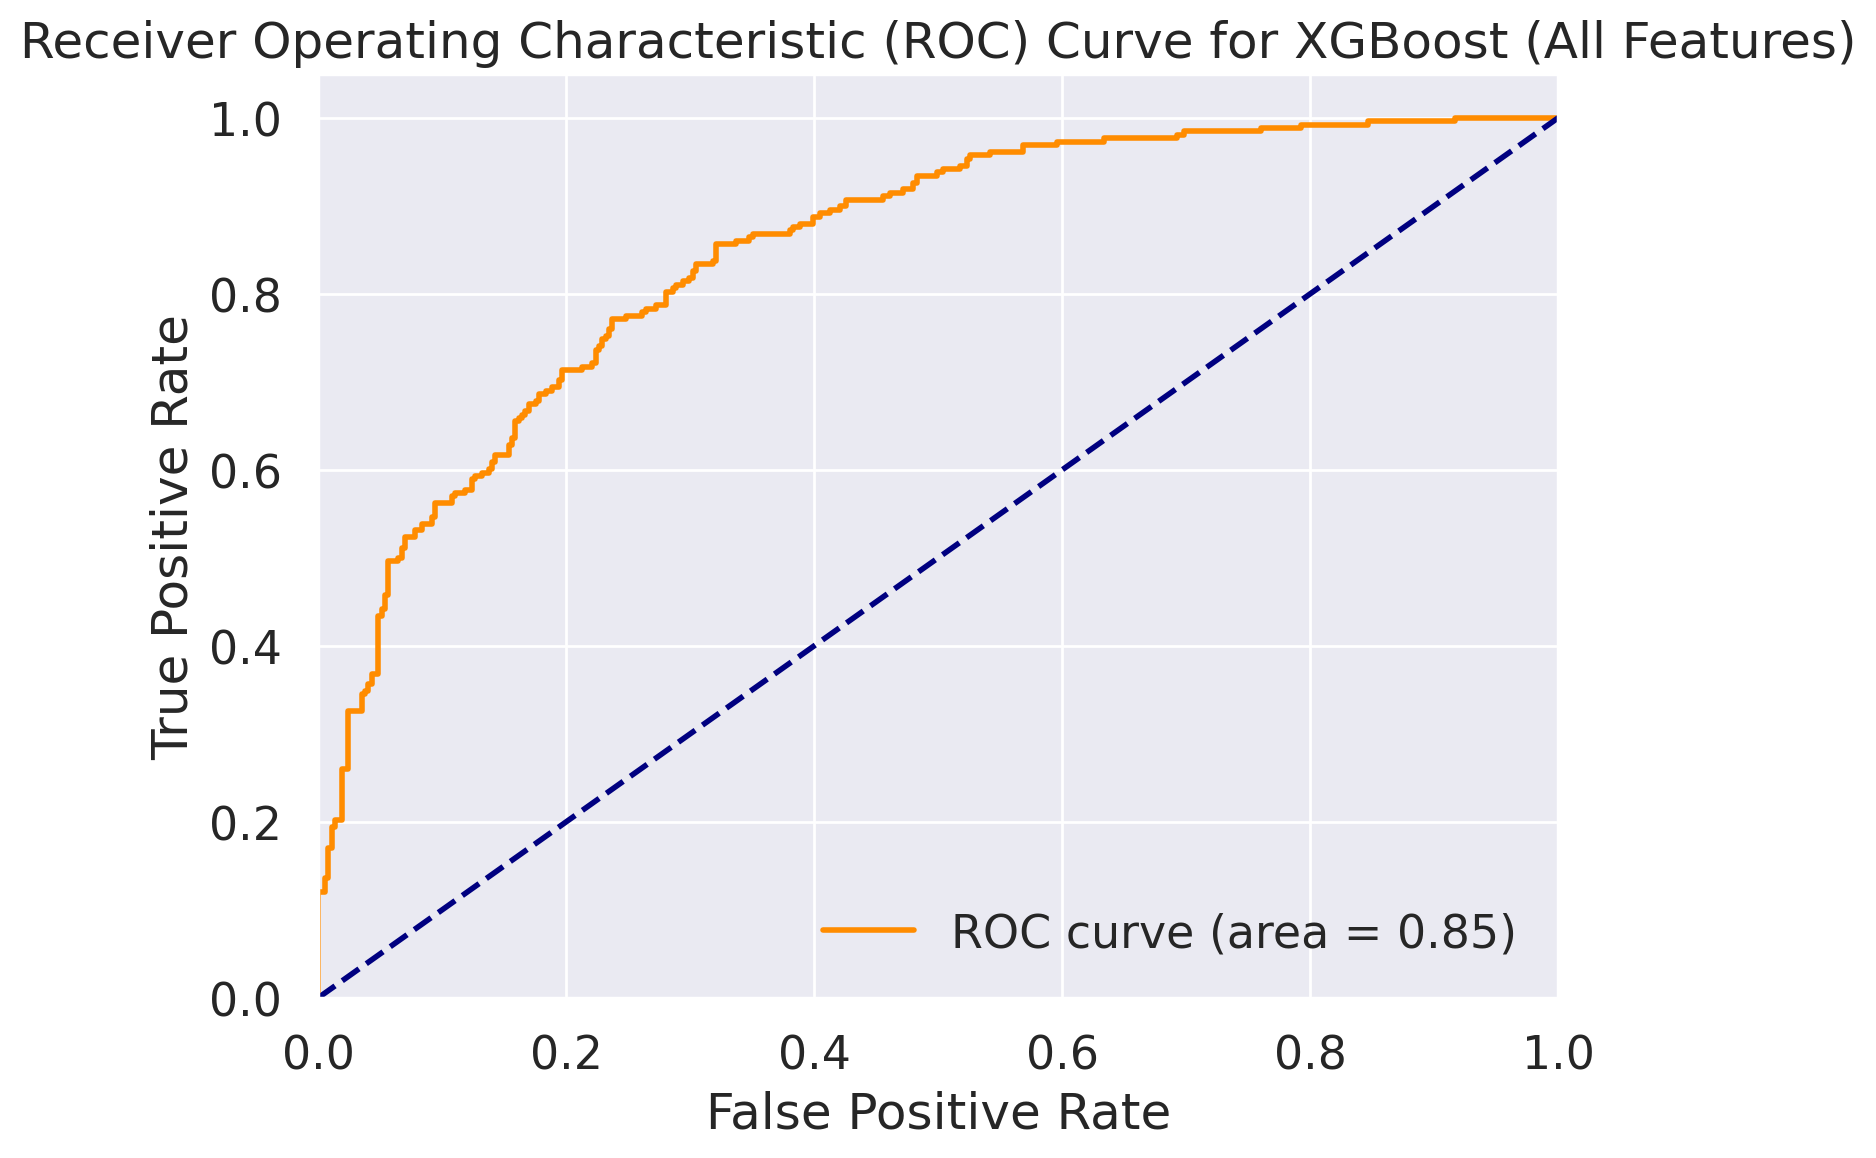

In [27]:
# roc curve for the xgboost that uses all features

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test_all and y_pred_prob are defined from the previous code block
fpr, tpr, thresholds = roc_curve(y_test_all, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost (All Features)')
plt.legend(loc="lower right")
plt.show()


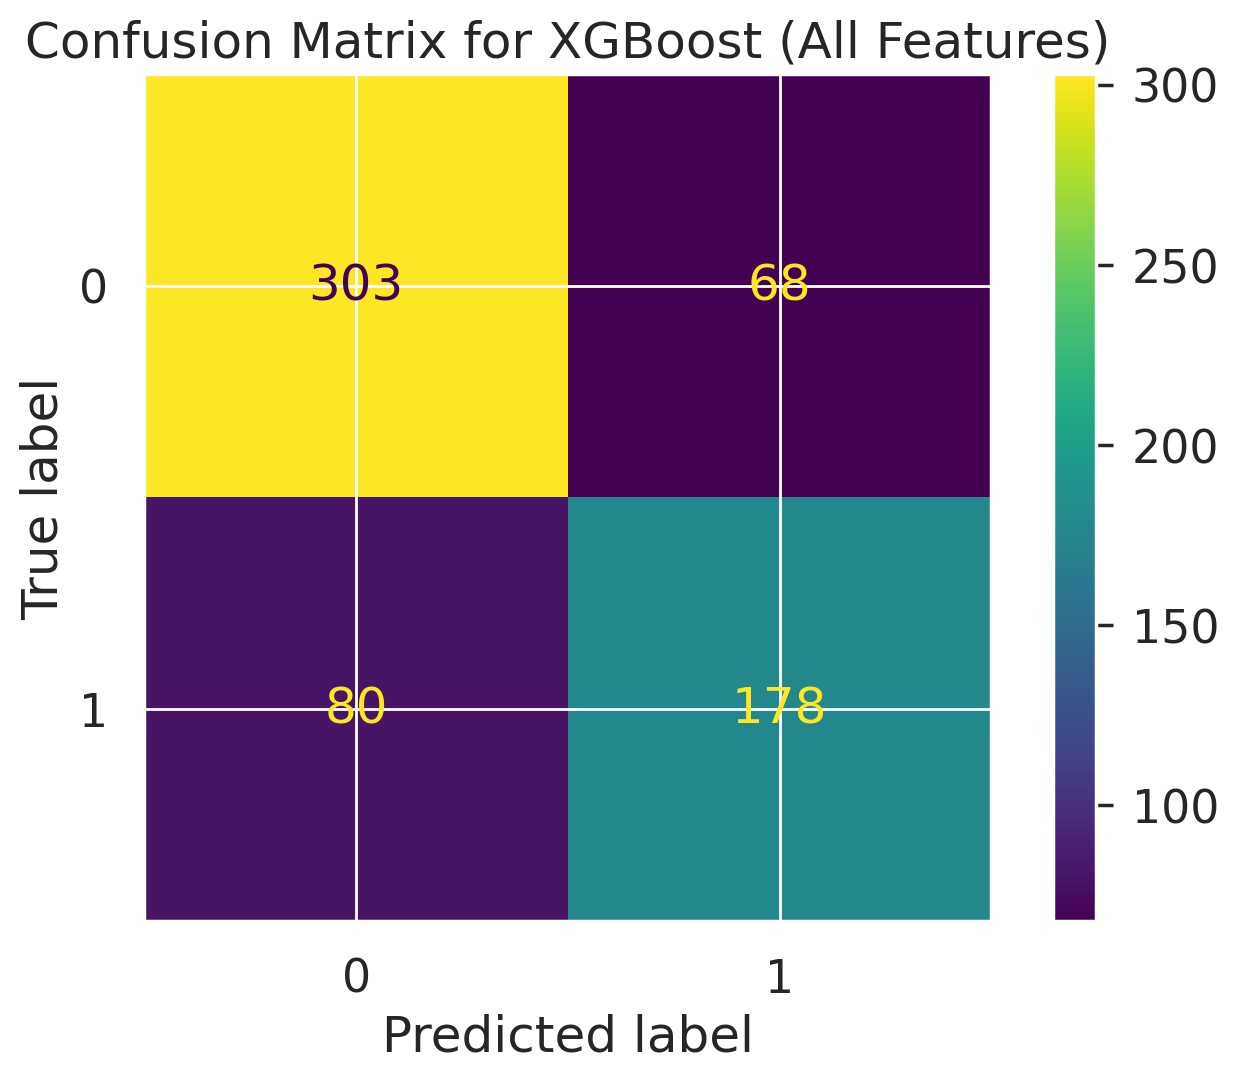

In [29]:
# confusion matrix to visualize xgboost for all features

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test_all and y_pred are defined from the previous code block
cm = confusion_matrix(y_test_all, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for XGBoost (All Features)')
plt.show()



Top 10 most important features affecting survival (All Features Model):
      importance
f578   11.741220
f8     11.271972
f181   11.062844
f0     10.226014
f2      9.887328
f5      8.905062
f394    8.737042
f256    8.269762
f126    7.473979
f449    7.160259


<Figure size 1000x600 with 0 Axes>

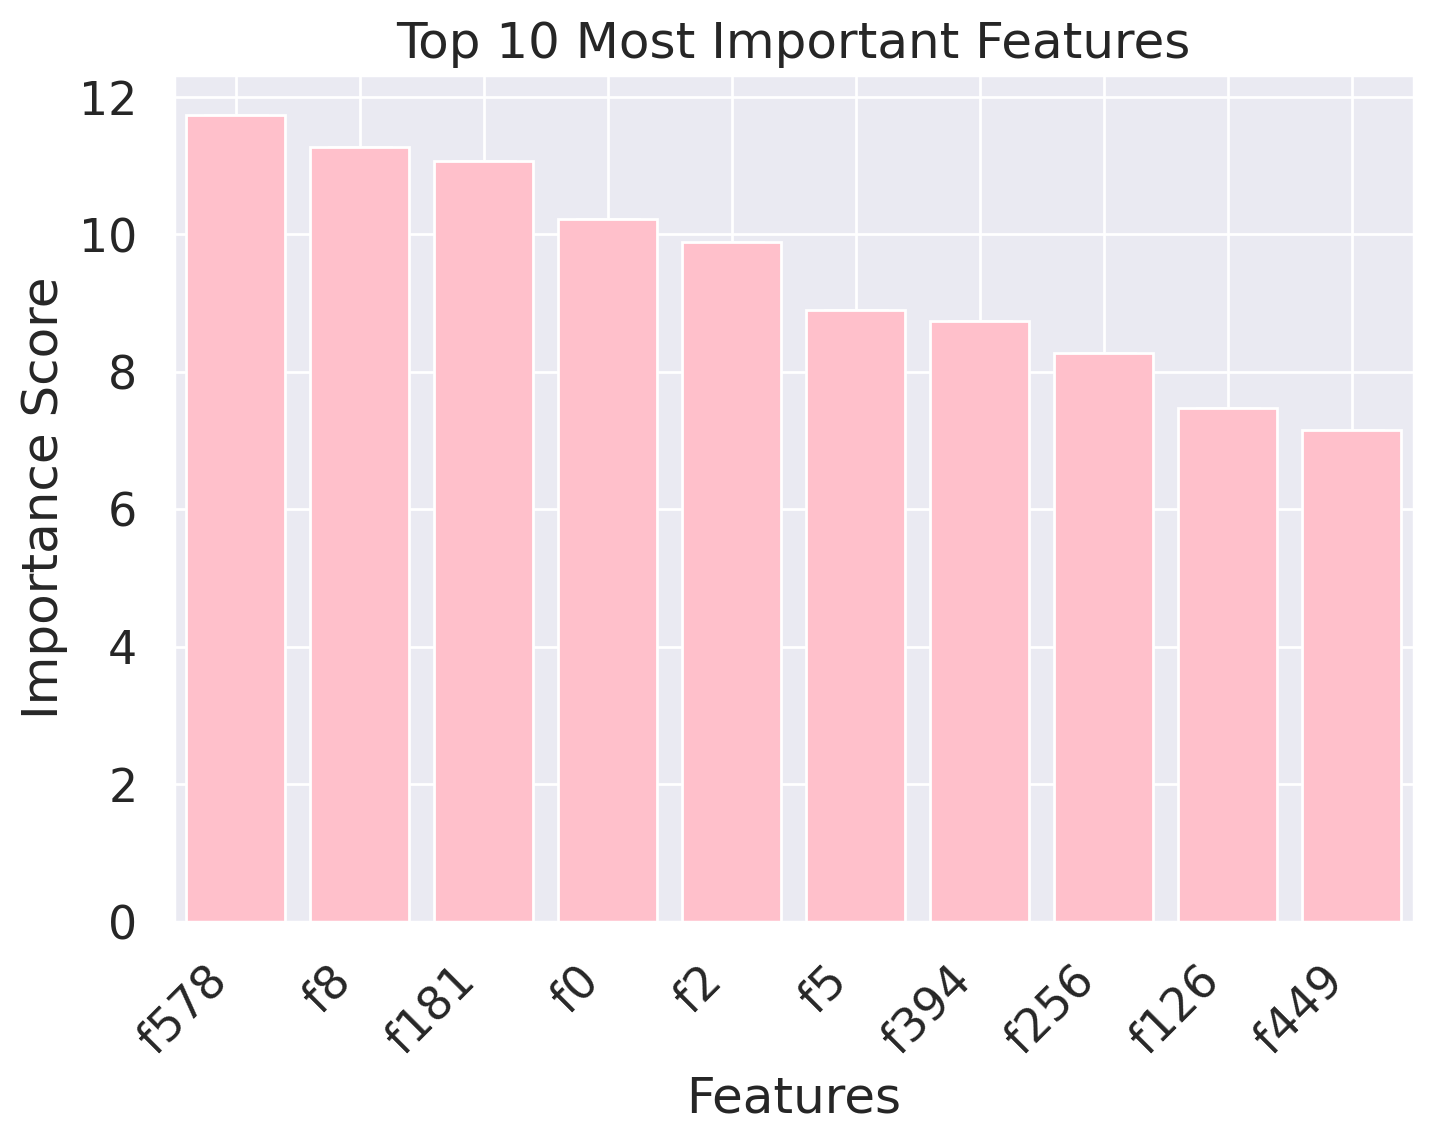

In [57]:
# top 10 most important features affecting survival from the model that includes all features

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import warnings
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Get feature importances from the trained XGBoost model (all features)
feature_importances = model.get_score(importance_type="gain")

# Create a DataFrame for better visualization
importance_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['importance'])
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Print the top 10 most important features
print("\nTop 10 most important features affecting survival (All Features Model):")
print(importance_df.head(10))


# create a bar plot to visualize feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='bar')
plt.title('Top 10 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')

# remove legend
plt.legend().remove()

# make color of bars pink
plt.bar(importance_df.head(10).index, importance_df.head(10)['importance'], color='pink')

plt.show()


# **Classification Metrics**

In [4]:
# partion features and target
X = df2.drop('overall_survival', axis=1)
y = df2['overall_survival']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

# scale features
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# build classifier
model = LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# get the accuracy score
print(f'The classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.')

ValueError: could not convert string to float: 'BREAST CONSERVING'

In [ ]:
y.value_counts(normalize=True)

,proportion
overall_survival,
0,0.567176
1,0.432824


# **Decision Tree**

In [ ]:
# Relevant imports
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Load the data

X = df2.drop('overall_survival', axis=1)
y = df2['overall_survival']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)

In [7]:
breastcancer_dt = DecisionTreeClassifier(random_state=1)

# Fit
breastcancer_dt.fit(X_train, y_train)

ValueError: could not convert string to float: 'BREAST CONSERVING'

In [8]:
y_pred = breastcancer_dt.predict(X_test)

ValueError: could not convert string to float: 'BREAST CONSERVING'

In [ ]:
breastcancer_dt_acc = accuracy_score(y_test, y_pred)

In [ ]:
breastcancer_dt_acc

0.6610687022900763

In [ ]:
# get the accuracy score
print(f'The classifier has an accuracy score of {round(breastcancer_dt_acc, 3)}.')

# **Random Forest to Predict Overall Survival**

In [ ]:
# Create a df2 with only values that are numbers
df2 = df.select_dtypes(include=np.number)
df2.head()


,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,75.65,0,1.0,3.0,1,10.0,NaN,6.044,140.500000,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [ ]:
# Split the data into features (X) and target (y)
X = df2.drop('overall_survival', axis=1)
y = df2['overall_survival']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6850393700787402


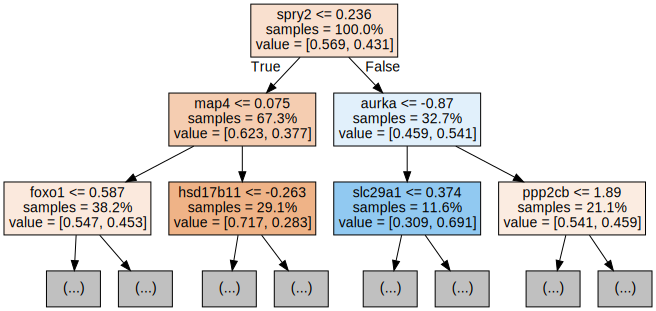

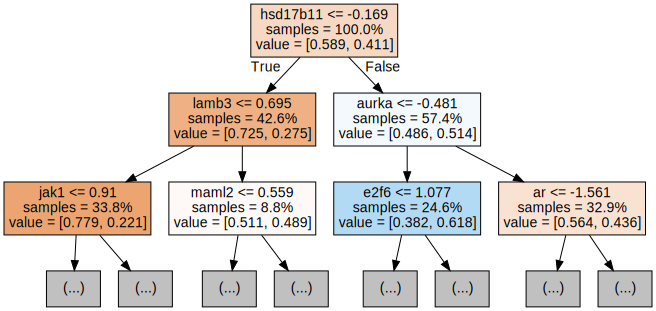

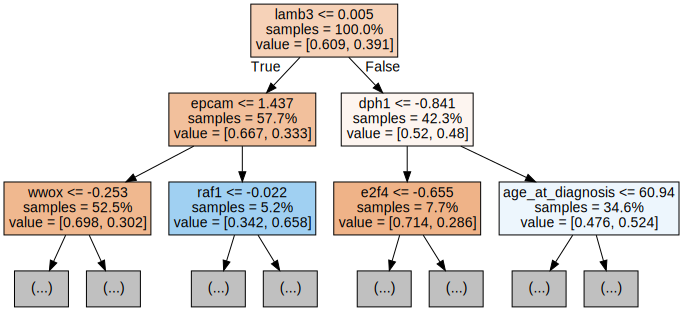

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# **Summary**

Among all features, the top clinical predictors of survival included: Type of breast surgery, Age at diagnosis, PR (progesterone receptor) status, and Tumor subtype classifications such as ER+/HER2 Low Profile- ER+/HER2-low is a breast cancer subtype that's estrogen receptor (ER) positive and has low levels of human epidermal growth factor receptor 2 (HER2). It's a clinically significant subtype that can be challenging to diagnose. These factors had the highest influence on the model's predictions. This insight could help doctors prioritize patient characteristics when assessing survival probability.

This model has significant real-world applications. It can help identify high-risk patients based on their clinical and genetic profiles, assisting healthcare providers in creating personalized treatment plans. Additionally, it provides valuable insights into potential biomarkers associated with survival, which could contribute to breast cancer research and drug development.

While the model performed well using clinical features, future improvements could involve enhancing genetic feature selection, integrating additional patient history data, and testing deep learning approaches. This could improve survival prediction and provide a more comprehensive tool for breast cancer prognosis.


# **References:**

https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric

https://pmc.ncbi.nlm.nih.gov/articles/PMC5461908/

https://www.nature.com/articles/s41523-018-0056-8
